### Importing Libraries

In [27]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [13]:
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|', lineterminator='\n', on_bad_lines='warn')

# df.to_parquet('../data/raw/acis_insurance_data.parquet')

/tmp/ipykernel_4647/1221577431.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|', lineterminator='\n', on_bad_lines='warn')


### Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [4]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims\r'],
      dtype='object')

In [5]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims\r
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


## Data Preparation
#### Cleanining and validating data types, handling missing values

### Handling missing values

In [6]:
# df.columns.nunique()
missing_values = df.isnull().sum()
missing_percent = (missing_values/len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

print("Missing Values Summary:\n", missing_summary[missing_summary['Missing Count'] > 0])

Missing Values Summary:
                          Missing Count  Missing Percentage
Bank                            145961           14.594670
AccountType                      40232            4.022806
MaritalStatus                     8259            0.825819
Gender                            9536            0.953507
mmcode                             552            0.055195
VehicleType                        552            0.055195
make                               552            0.055195
Model                              552            0.055195
Cylinders                          552            0.055195
cubiccapacity                      552            0.055195
kilowatts                          552            0.055195
bodytype                           552            0.055195
NumberOfDoors                      552            0.055195
VehicleIntroDate                   552            0.055195
CustomValueEstimate             779642           77.956560
CapitalOutstanding             

In [7]:
df.dropna(subset=["NumberOfVehiclesInFleet", "CrossBorder"], inplace=True)

In [14]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims\r
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#### Standardized the CoverCategory column to resolve duplicates

In [28]:
def clean_category(category):
    if pd.isna(category):
        return 'Unknown'
    category = str(category).strip().lower()
    category = category.replace('.', '').replace('-', '').replace(' (2015)', '')
    category_map = {
        'owndamage': 'Own Damage',
        'windscreen': 'Windscreen',
        'incomprotector': 'Income Protector',
        'creditprotection': 'Credit Protection'
    }
    return category_map.get(category, category.title())

# Apply cleaning to the dataframe
df['CleanCoverCategory'] = df['CoverCategory'].apply(clean_category)

# Recalculate loss ratio by CleanCoverCategory
cover_category_loss = df.groupby('CleanCoverCategory')[['TotalClaims', 'TotalPremium']].sum()
cover_category_loss['LossRatio'] = cover_category_loss['TotalClaims'] / cover_category_loss['TotalPremium'] * 100

# Filter and sort for top 10 finite ratios
valid_cover = cover_category_loss[
    np.isfinite(cover_category_loss['LossRatio']) & 
    (cover_category_loss['LossRatio'] > 0)
].sort_values('LossRatio', ascending=False).head(10)

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [15]:
df['TotalPremium'].describe()

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

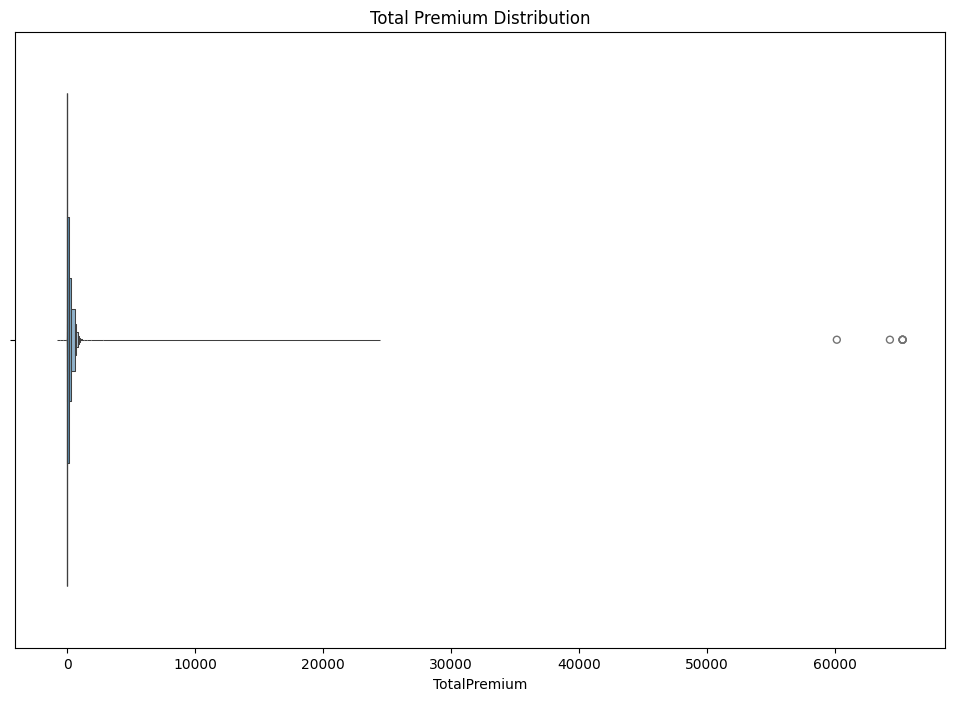

In [16]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='TotalPremium', data=df)
plt.title('Total Premium Distribution')
plt.show()


) missing from font(s) DejaVu Sans.surance-Analytics/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


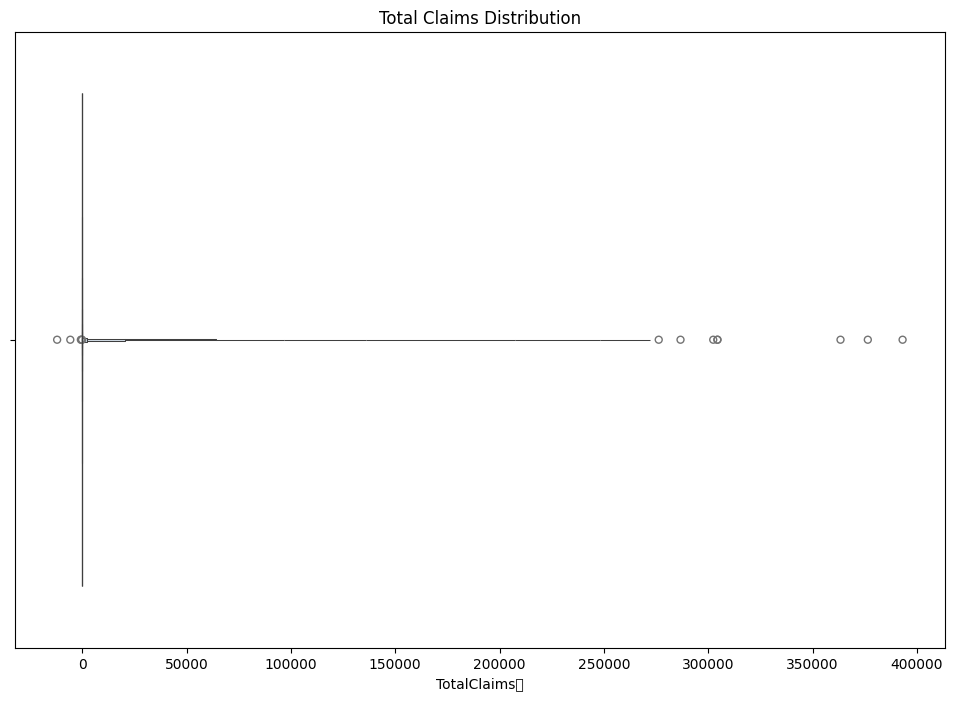

In [17]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='TotalClaims\r', data=df)
plt.title('Total Claims Distribution')
plt.show()

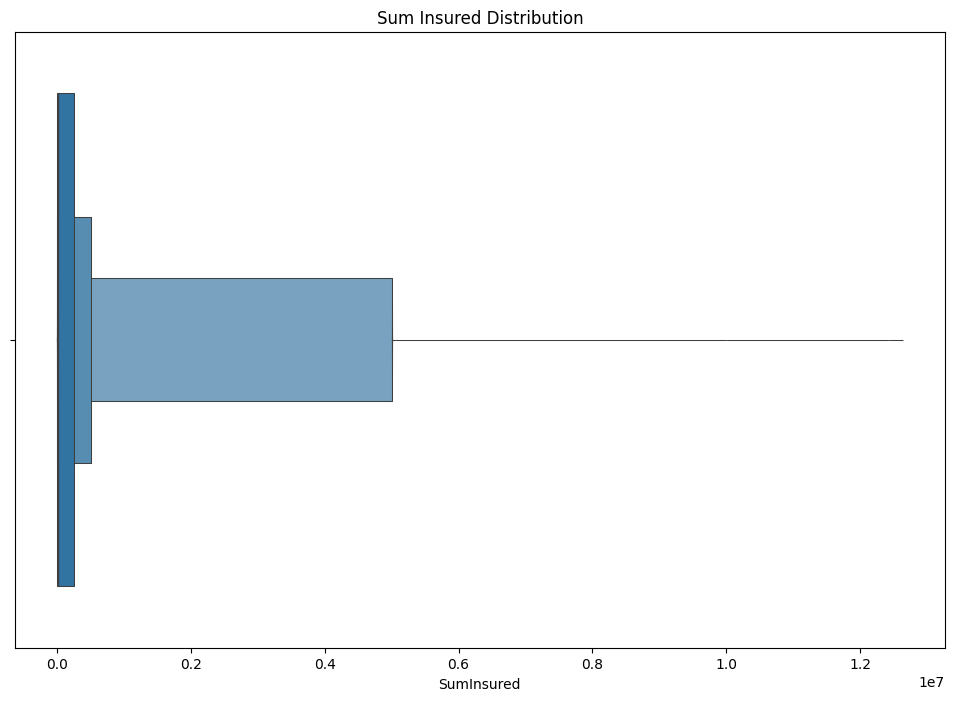

In [18]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='SumInsured', data=df)
plt.title('Sum Insured Distribution')
plt.show()

### Loss Ratio Segmentation

In [22]:
total_claims = df['TotalClaims\r'].sum()
total_premium = df['TotalPremium'].sum()

loss_ratio = total_claims / total_premium

print(f"Overall Loss Ratio: {loss_ratio:.2%}") 
df['TotalClaims'] = df['TotalClaims\r']


Overall Loss Ratio: 104.77%


In [23]:
province_loss = df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum()
province_loss['LossRatio'] = province_loss['TotalClaims'] / province_loss['TotalPremium'] * 100
province_loss = province_loss.sort_values('LossRatio', ascending=False)
print(province_loss[['LossRatio']])


                LossRatio
Province                 
Gauteng        122.201812
KwaZulu-Natal  108.269332
Western Cape   105.947196
North West      79.036694
Mpumalanga      72.089735
Free State      68.075814
Limpopo         66.119854
Eastern Cape    63.381348
Northern Cape   28.269855


In [24]:
vehicle_loss = df.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].sum()
vehicle_loss['LossRatio'] = vehicle_loss['TotalClaims'] / vehicle_loss['TotalPremium'] * 100
vehicle_loss = vehicle_loss.sort_values('LossRatio', ascending=False)
print(vehicle_loss[['LossRatio']])


                    LossRatio
VehicleType                  
Heavy Commercial   162.811164
Medium Commercial  105.025086
Passenger Vehicle  104.819837
Light Commercial    23.206555
Bus                 13.729197


In [25]:
gender_loss = df.groupby('Gender')[['TotalClaims', 'TotalPremium']].sum()
gender_loss['LossRatio'] = gender_loss['TotalClaims'] / gender_loss['TotalPremium'] * 100
gender_loss = gender_loss.sort_values('LossRatio', ascending=False)
print(gender_loss[['LossRatio']])


                LossRatio
Gender                   
Not specified  105.931060
Male            88.390993
Female          82.187876


In [30]:
registration_year_loss = df.groupby('RegistrationYear')[['TotalClaims', 'TotalPremium']].sum()
registration_year_loss['LossRatio'] = registration_year_loss['TotalClaims'] / registration_year_loss['TotalPremium'] * 100
registration_year_loss = registration_year_loss.sort_values('LossRatio', ascending=False)
print("\nLoss Ratio by Registration Year:")
print(registration_year_loss[['LossRatio']])

# Group by CoverCategory and calculate loss ratio
cover_category_loss = df.groupby('CleanCoverCategory')[['TotalClaims', 'TotalPremium']].sum()
cover_category_loss['LossRatio'] = cover_category_loss['TotalClaims'] / cover_category_loss['TotalPremium'] * 100
cover_category_loss = cover_category_loss.sort_values('LossRatio', ascending=False)
print("\nLoss Ratio by Cover Category:")
print(cover_category_loss[['LossRatio']])


Loss Ratio by Registration Year:
                   LossRatio
RegistrationYear            
2001              146.286721
2011              123.775790
2008              122.034772
2007              121.995386
2010              107.762457
2012              105.328279
2014              101.162769
2004               98.985078
2013               97.970829
2005               96.928497
2006               95.403256
2009               91.202868
1998               87.129358
2003               81.642516
2015               76.327662
2002               69.436857
1996               14.258720
1999                5.166501
1997                1.802344
1988                0.000000
1995                0.000000
1987                0.000000
1992                0.000000
1994                0.000000
2000                0.000000

Loss Ratio by Cover Category:
                                                     LossRatio
CleanCoverCategory                                            
Factory Fitted Sound And O

/tmp/ipykernel_4647/3757326390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=province_loss.index, data=province_loss, palette='viridis')


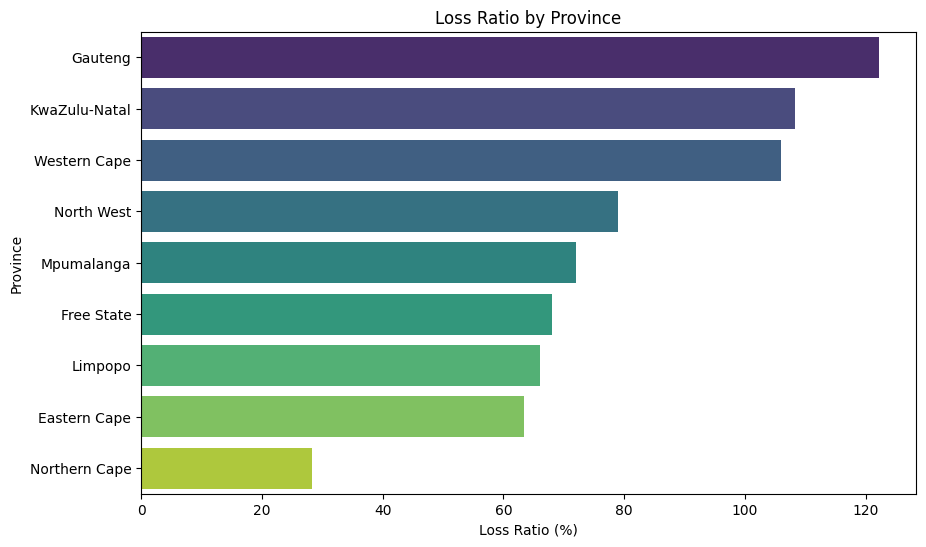

/tmp/ipykernel_4647/3757326390.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=vehicle_loss.index, data=vehicle_loss, palette='magma')


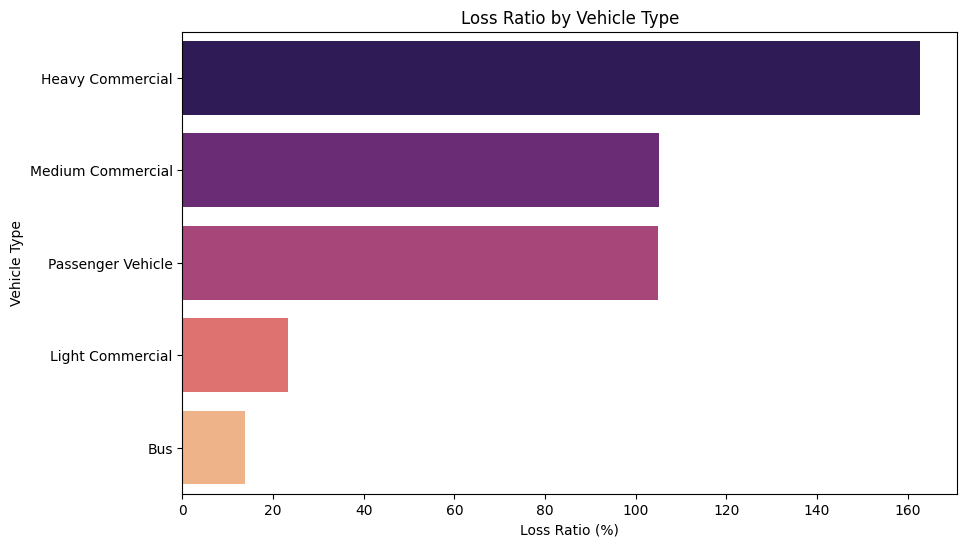

/tmp/ipykernel_4647/3757326390.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=gender_loss.index, data=gender_loss, palette='coolwarm')


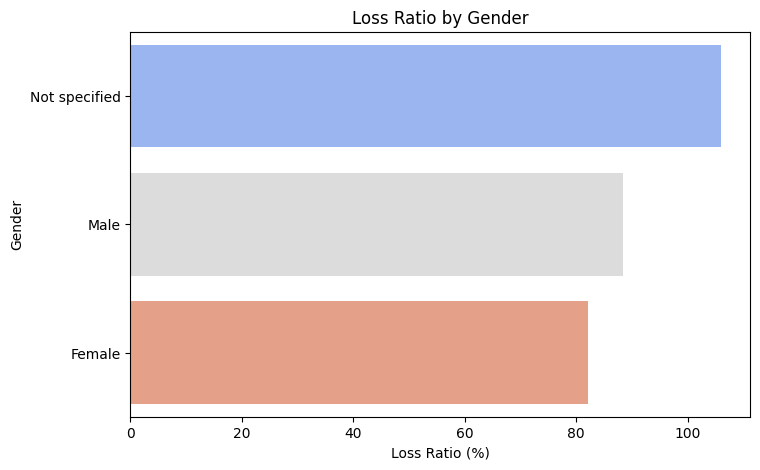

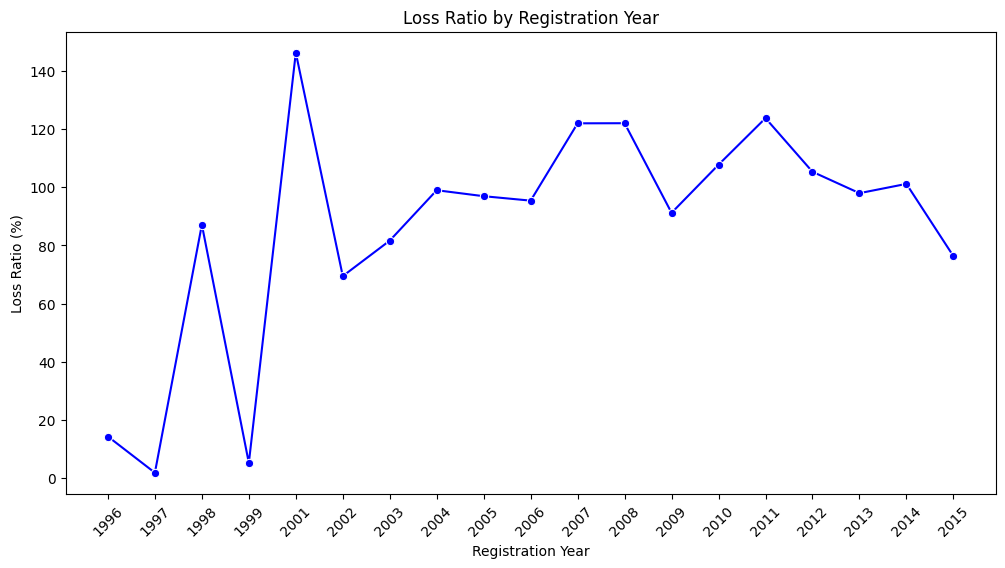

/tmp/ipykernel_4647/3757326390.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=valid_cover.index, data=valid_cover, palette='Reds_d')


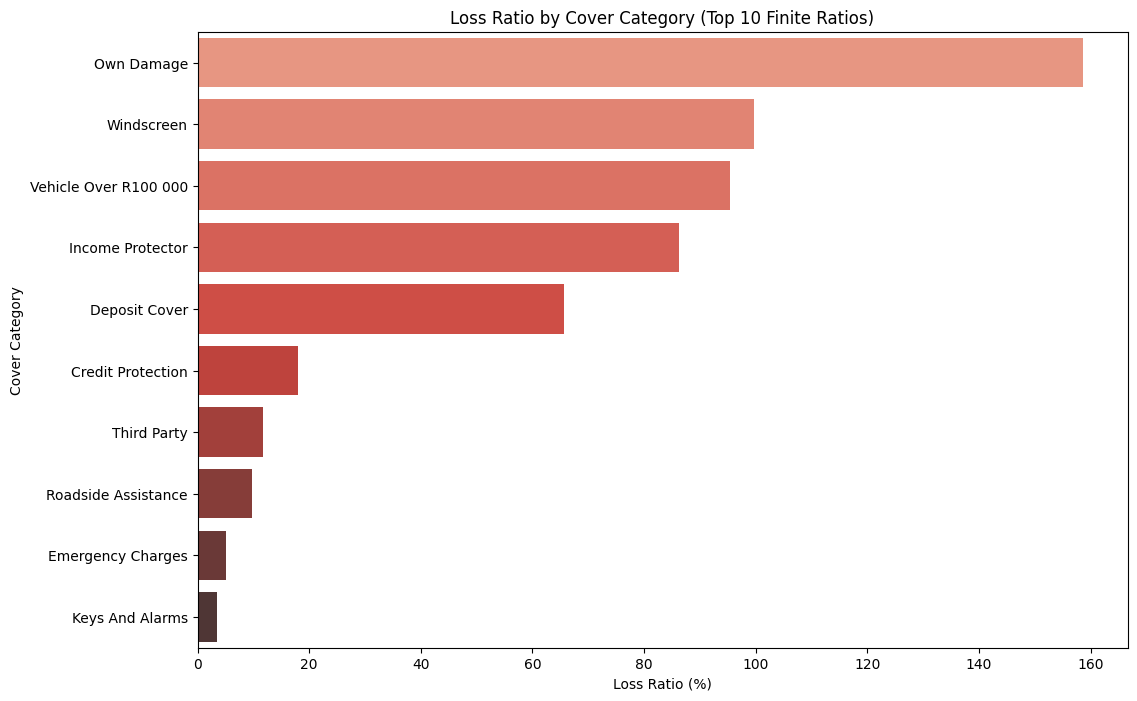

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LossRatio', y=province_loss.index, data=province_loss, palette='viridis')
plt.title('Loss Ratio by Province')
plt.xlabel('Loss Ratio (%)')
plt.ylabel('Province')
plt.show()

# Plot Loss Ratio by VehicleType
plt.figure(figsize=(10, 6))
sns.barplot(x='LossRatio', y=vehicle_loss.index, data=vehicle_loss, palette='magma')
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Loss Ratio (%)')
plt.ylabel('Vehicle Type')
plt.show()

# Plot Loss Ratio by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='LossRatio', y=gender_loss.index, data=gender_loss, palette='coolwarm')
plt.title('Loss Ratio by Gender')
plt.xlabel('Loss Ratio (%)')
plt.ylabel('Gender')
plt.show()

# Filter RegistrationYear for meaningful data (exclude 0% and infinite ratios)
valid_years = registration_year_loss[
    (registration_year_loss['LossRatio'] > 0) & 
    np.isfinite(registration_year_loss['LossRatio'])
].index
filtered_reg_year_loss = registration_year_loss.loc[valid_years].sort_index()  # Sort by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_reg_year_loss.index.astype(str), y='LossRatio', data=filtered_reg_year_loss, 
             marker='o', color='blue')
plt.title('Loss Ratio by Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Loss Ratio (%)')
plt.xticks(rotation=45)
plt.show()

# Filter CoverCategory for finite and non-zero loss ratios
valid_cover = cover_category_loss[np.isfinite(cover_category_loss['LossRatio']) & (cover_category_loss['LossRatio'] > 0)]
valid_cover = valid_cover.sort_values('LossRatio', ascending=False).head(10)  # Top 10 for clarity
plt.figure(figsize=(12, 8))
sns.barplot(x='LossRatio', y=valid_cover.index, data=valid_cover, palette='Reds_d')
plt.title('Loss Ratio by Cover Category (Top 10 Finite Ratios)')
plt.xlabel('Loss Ratio (%)')
plt.ylabel('Cover Category')
plt.show()

## DATA

In [34]:
categorical_cols = []
numerical_cols = []

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
        numerical_cols.append(col)

    except Exception:
        df[col] = df[col].astype('object')
        categorical_cols.append(col)

print(f"Numerical columns: {numerical_cols}\n {len(numerical_cols)}")
print(f"\n\nCategorical columns: {categorical_cols}\n {len(categorical_cols)}")


Numerical columns: ['UnderwrittenCoverID', 'PolicyID', 'IsVATRegistered', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims\r', 'TotalClaims']
 17


Categorical columns: ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'CleanCoverCategory']
 37


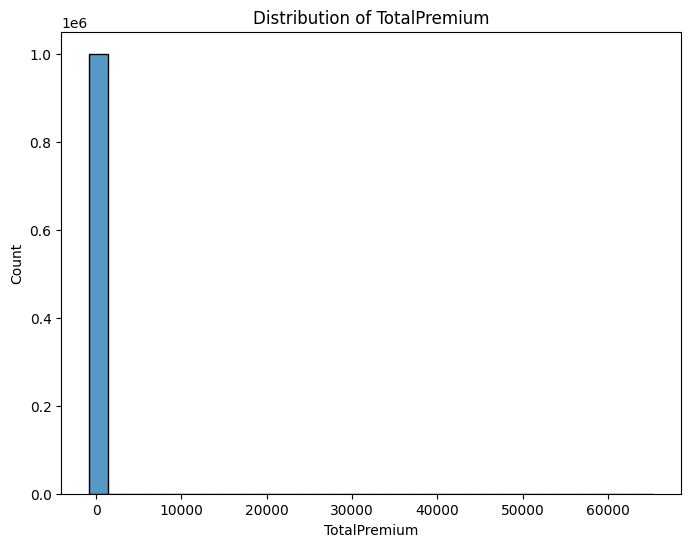

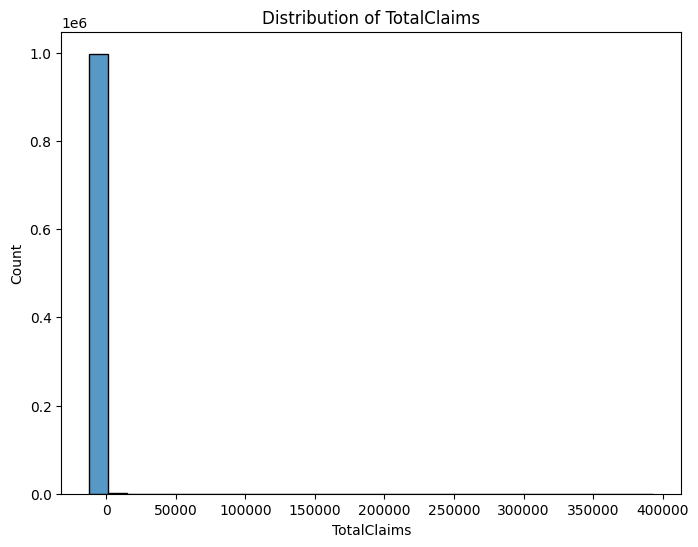

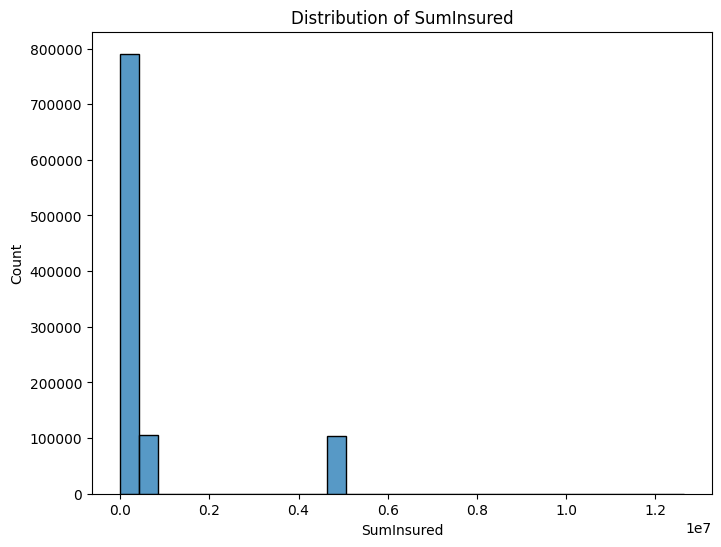

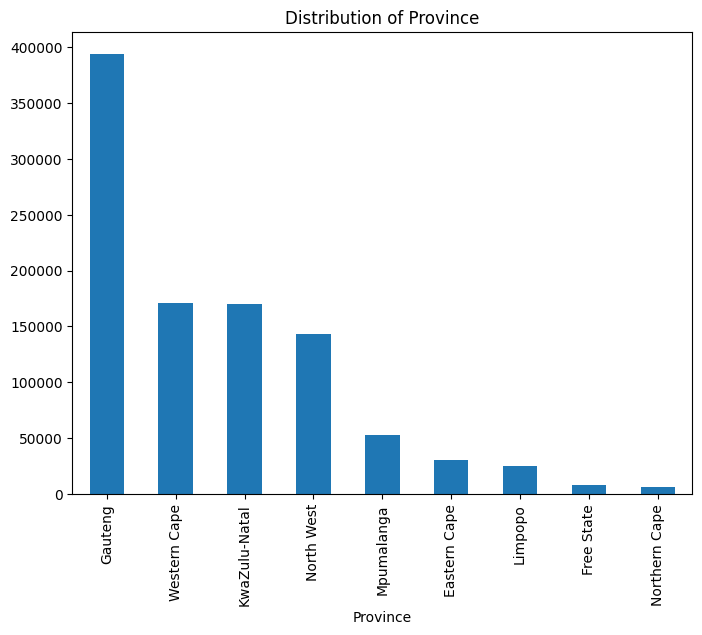

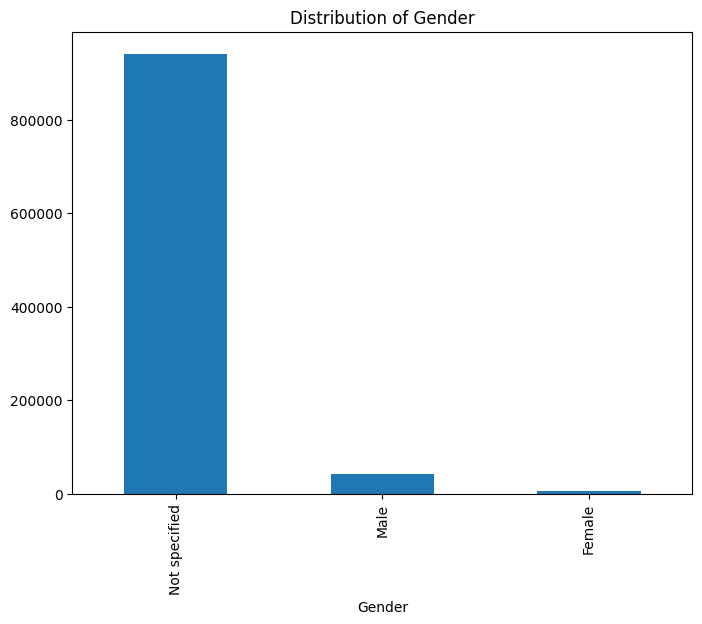

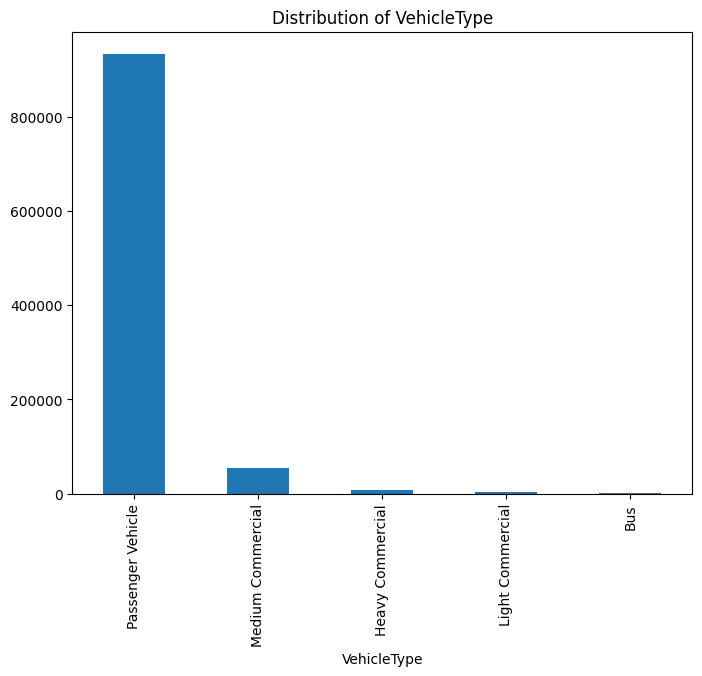

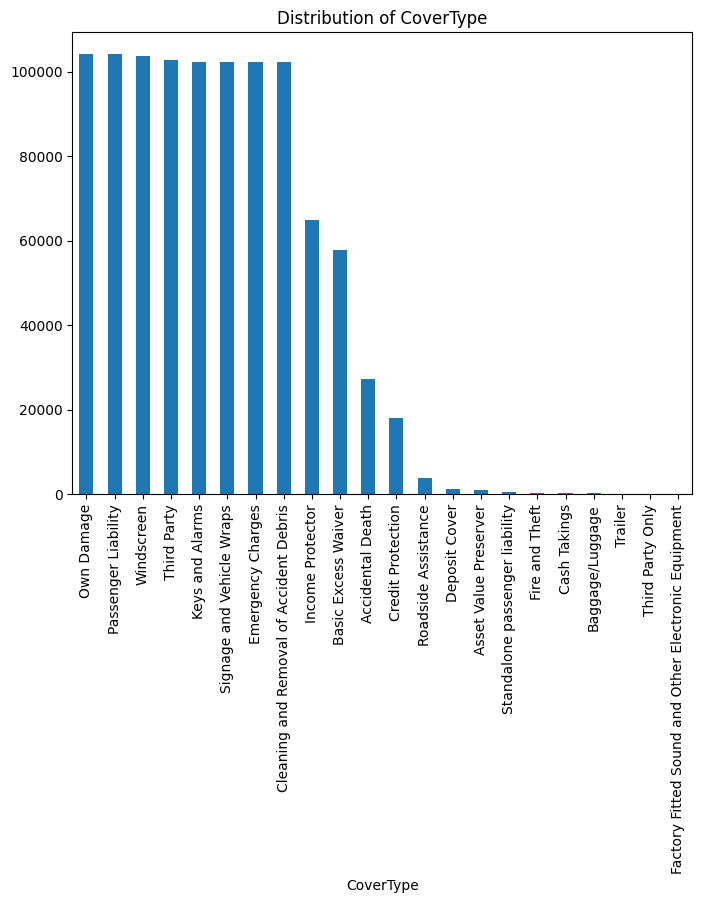

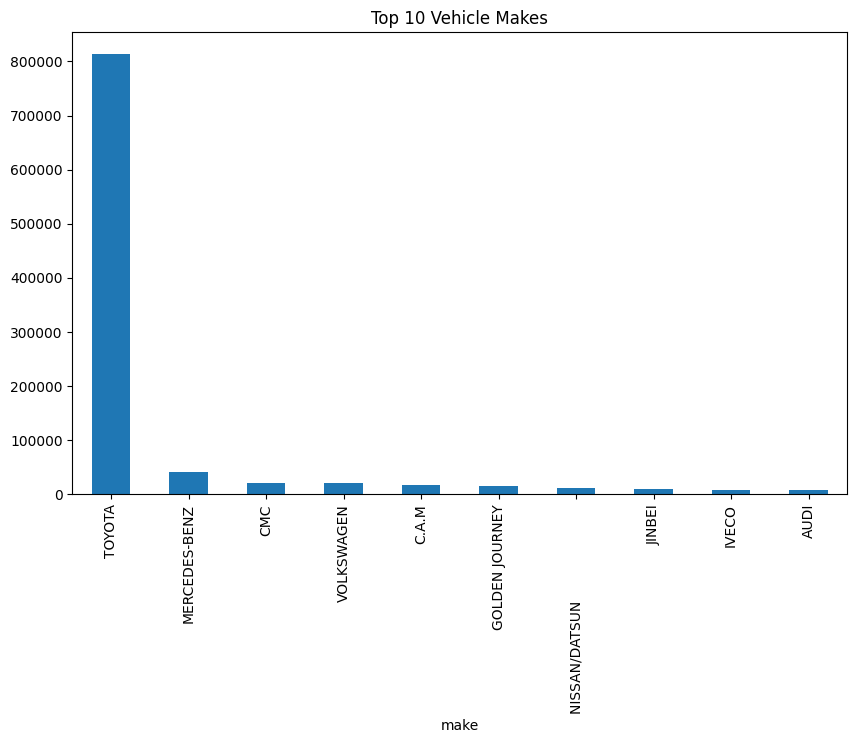

In [36]:
# Histograms
for col in ['TotalPremium', 'TotalClaims', 'SumInsured']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar charts
for col in ['Province', 'Gender', 'VehicleType', 'CoverType']:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Top 10 makes
plt.figure(figsize=(10, 6))
df['make'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes')
plt.show()

) missing from font(s) DejaVu Sans.3: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.surance-Analytics/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


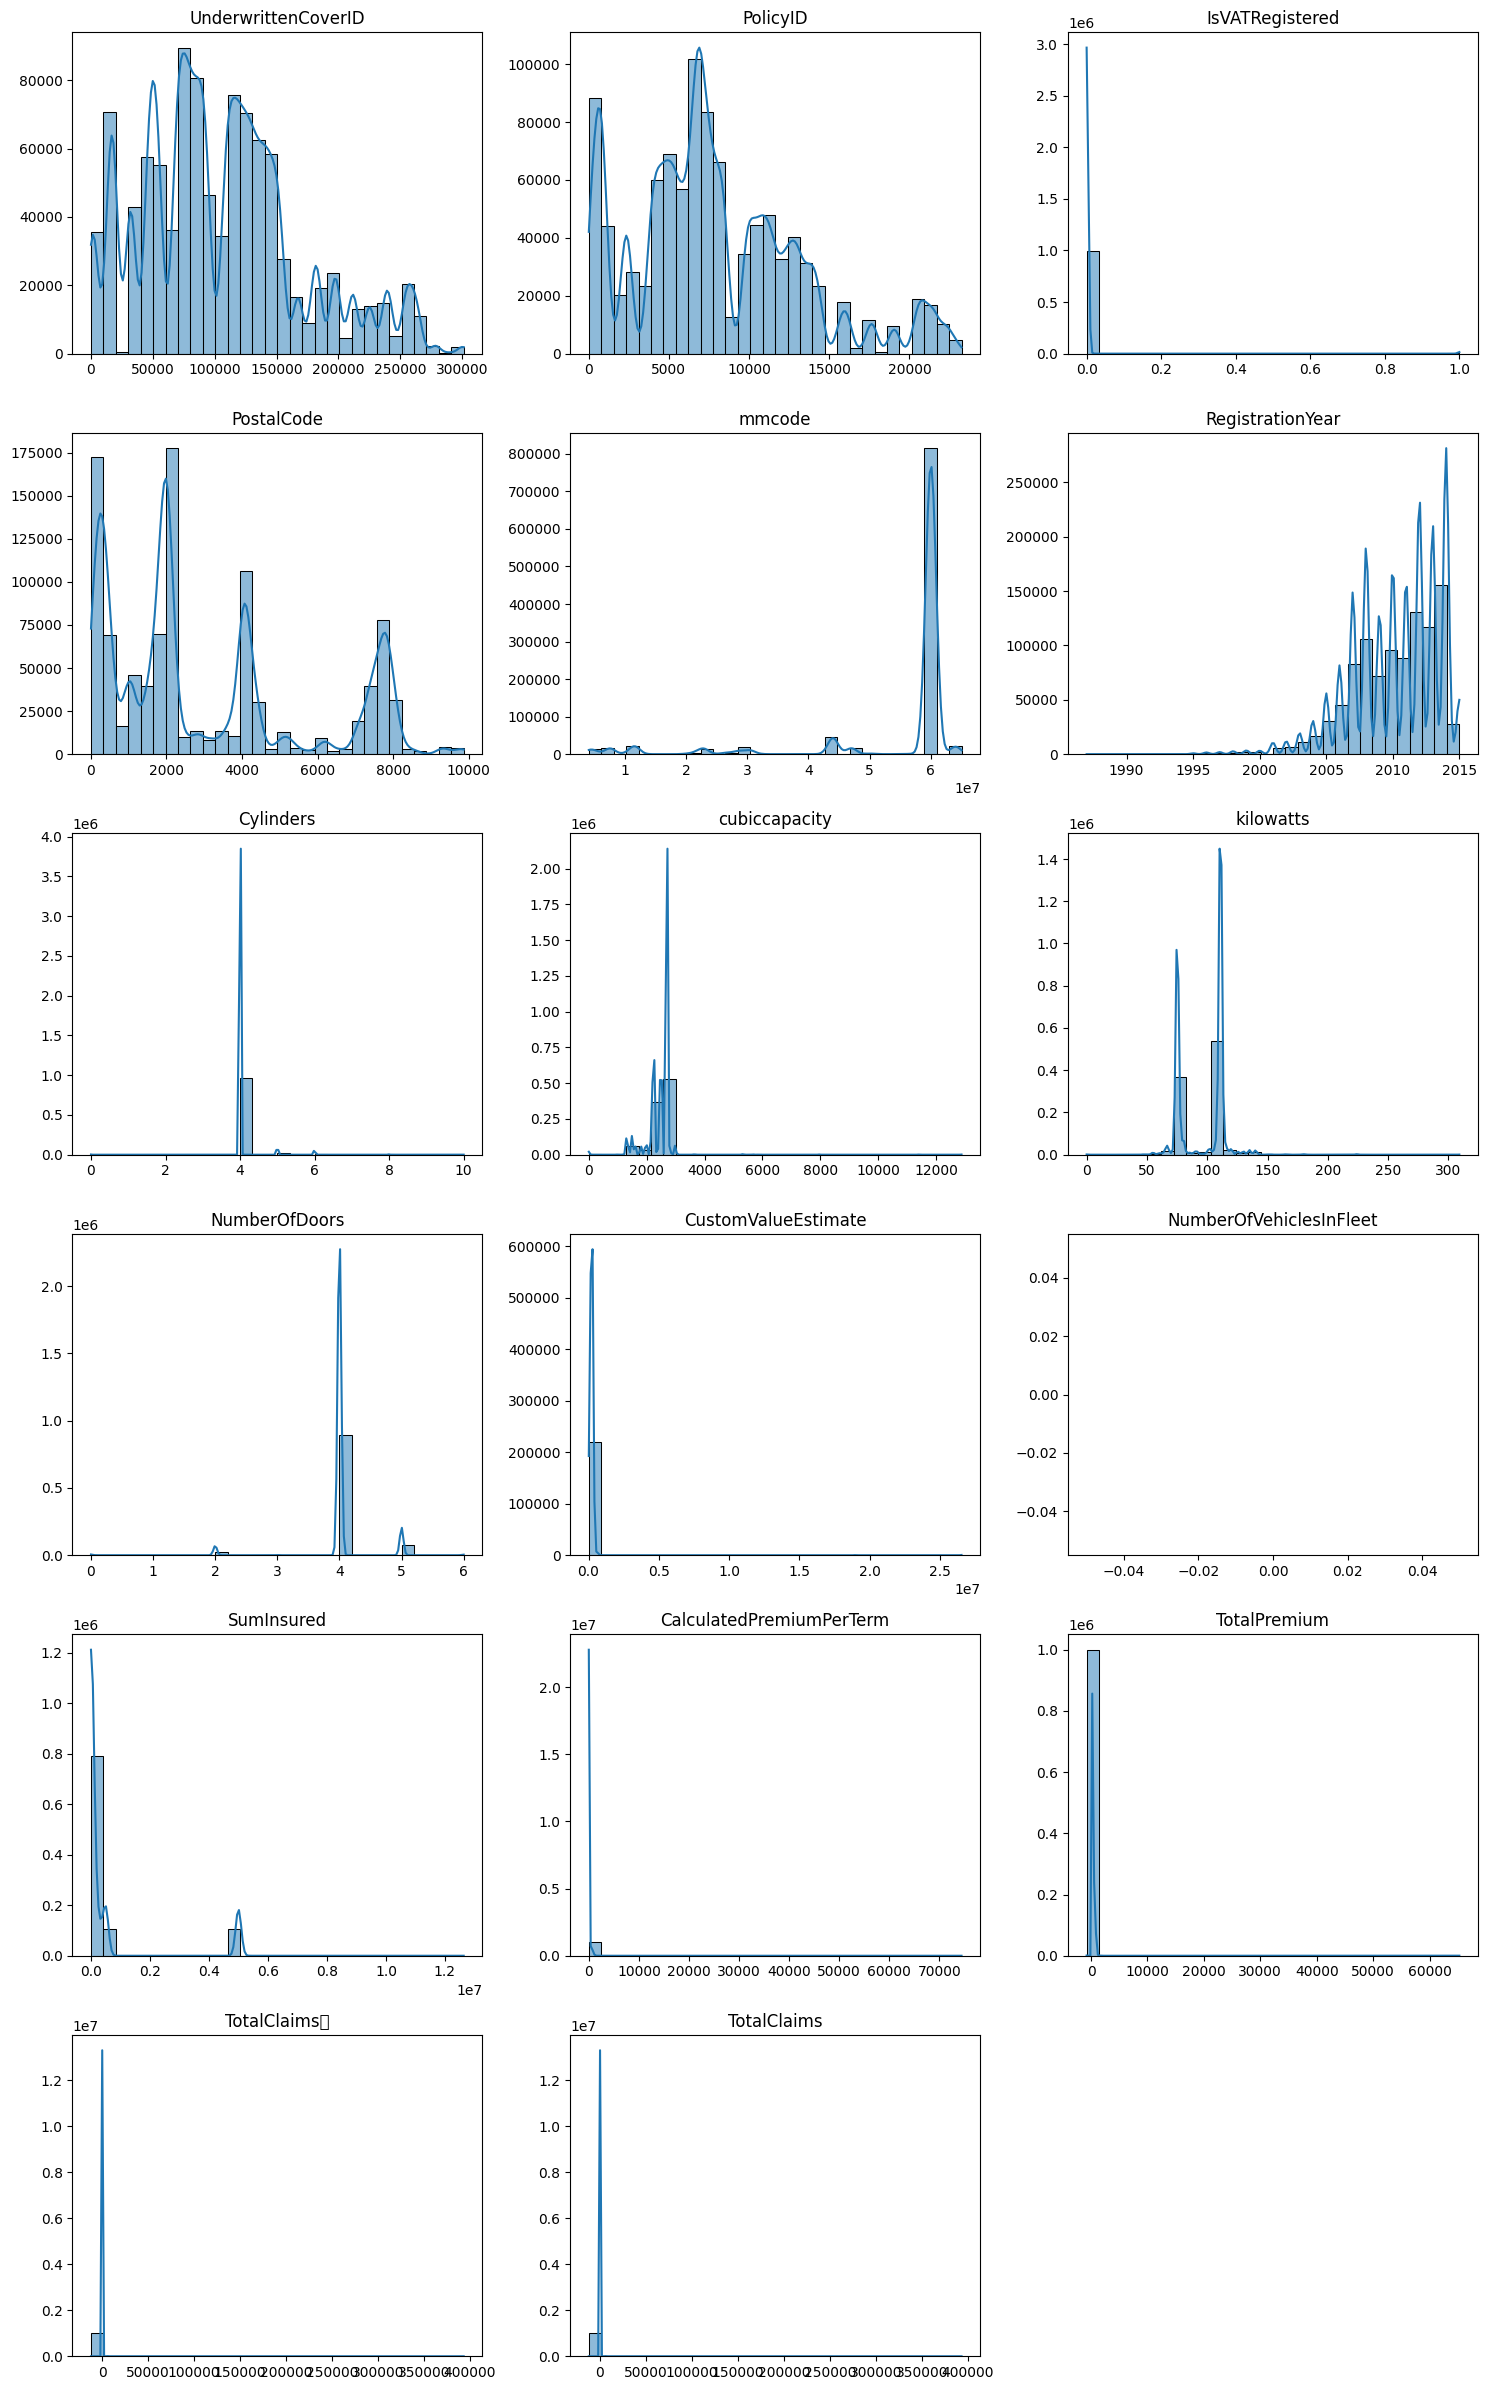

In [37]:
import math


cols_per_row = 3
num_plots = len(numerical_cols)
rows = math.ceil(num_plots / cols_per_row)
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)
df[numerical_cols] = df[numerical_cols].astype(float)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten() 

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Correlation and Bivariate Analysis

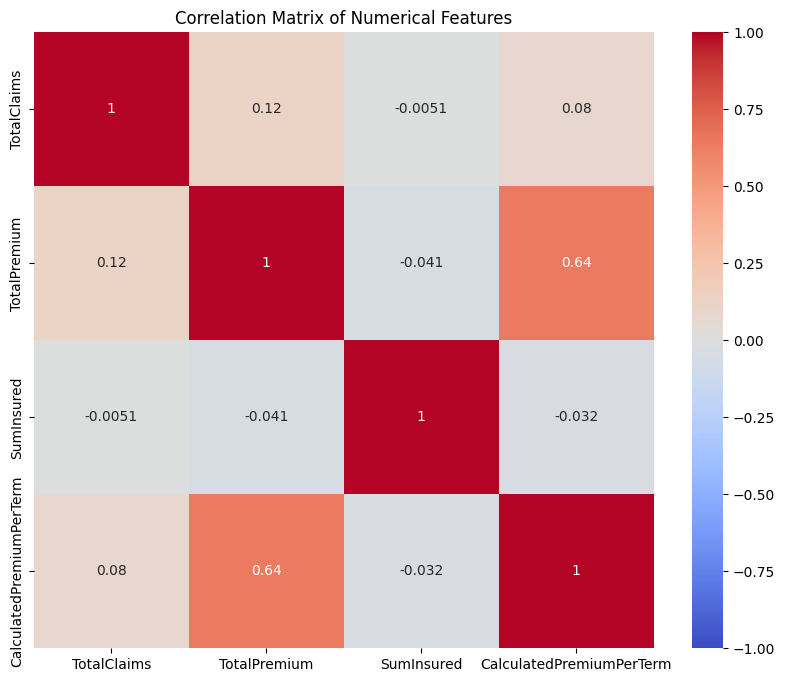

In [38]:
numerical_cols = ['TotalClaims', 'TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Biavariate Analysis

/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


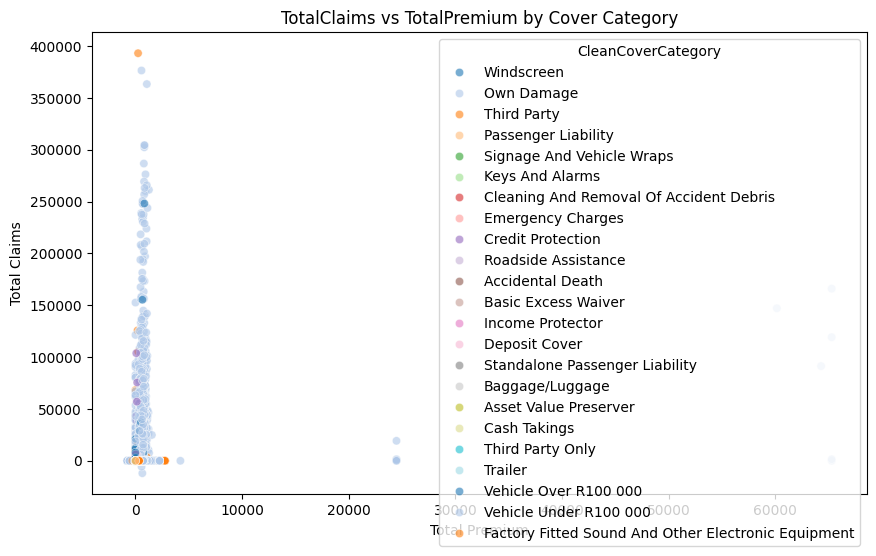

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='CleanCoverCategory', palette='tab20', alpha=0.6)
plt.title('TotalClaims vs TotalPremium by Cover Category')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

## P-Value Summary Table

P-Value Summary Table:
                     P-Value (TotalClaims)  P-Value (TotalPremium)
Province                           0.0000                     0.0
Gender                             0.0098                     0.0
VehicleType                        0.2616                     0.0
CleanCoverCategory                 0.0000                     0.0


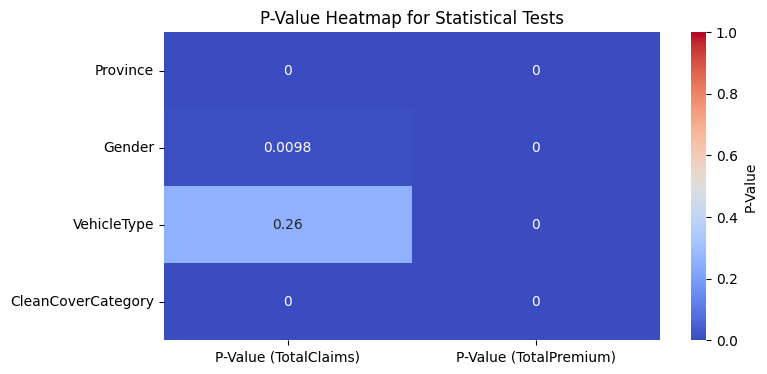

In [42]:
import scipy.stats as stats

# Function to perform ANOVA and return p-value
def get_p_value(group_var, value_var, df):
    groups = [group[value_var].dropna().values for name, group in df.groupby(group_var)]
    return stats.f_oneway(*groups)[1] if len(groups) > 1 and all(len(g) > 0 for g in groups) else np.nan

# Variables to test
categorical_vars = ['Province', 'Gender', 'VehicleType', 'CleanCoverCategory']
target_vars = ['TotalClaims', 'TotalPremium']

# Calculate p-values
p_values = {}
for cat_var in categorical_vars:
    p_values[cat_var] = {target: get_p_value(cat_var, target, df) for target in target_vars}

# Create summary table
p_value_table = pd.DataFrame(p_values).T
p_value_table.columns = ['P-Value (TotalClaims)', 'P-Value (TotalPremium)']
p_value_table = p_value_table.round(4)
print("P-Value Summary Table:\n", p_value_table)

plt.figure(figsize=(8, 4))
sns.heatmap(p_value_table, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'P-Value'})
plt.title('P-Value Heatmap for Statistical Tests')
plt.show()

In [44]:
# Prepare data (drop NA for simplicity)
df_clean = df[['TotalClaims', 'TotalPremium', 'Province', 'Gender', 'VehicleType', 'CleanCoverCategory']].dropna()

# T-test: Male vs Female TotalClaims
male_claims = df_clean[df_clean['Gender'] == 'Male']['TotalClaims']
female_claims = df_clean[df_clean['Gender'] == 'Female']['TotalClaims']
t_stat, p_val_t = stats.ttest_ind(male_claims, female_claims, equal_var=False) if len(male_claims) > 0 and len(female_claims) > 0 else (np.nan, np.nan)

# ANOVA: TotalClaims across Provinces
provinces = df_clean['Province'].unique()
anova_groups = [df_clean[df_clean['Province'] == prov]['TotalClaims'].dropna().values for prov in provinces if len(df_clean[df_clean['Province'] == prov]['TotalClaims'].dropna()) > 0]
f_stat, p_val_anova = stats.f_oneway(*anova_groups) if len(anova_groups) > 1 and all(len(g) > 0 for g in anova_groups) else (np.nan, np.nan)

# Chi-Squared: Gender vs VehicleType independence
contingency_table = pd.crosstab(df_clean['Gender'], df_clean['VehicleType'])
chi2_stat, p_val_chi, dof, expected = stats.chi2_contingency(contingency_table) if not contingency_table.empty else (np.nan, np.nan, np.nan, np.nan)

# Summary table
summary_table = pd.DataFrame({
    'Test': ['T-test (Male vs Female)', 'ANOVA (Provinces)', 'Chi-Squared (Gender vs VehicleType)'],
    'Statistic': [t_stat, f_stat, chi2_stat],
    'P-Value': [p_val_t, p_val_anova, p_val_chi]
}).round(4)

print(summary_table)

                                  Test  Statistic  P-Value
0              T-test (Male vs Female)    -0.2964    0.767
1                    ANOVA (Provinces)     6.1640    0.000
2  Chi-Squared (Gender vs VehicleType)   555.0998    0.000
